## Observations and Insights

## Dependencies and starter code

In [61]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)




In [62]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [63]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [64]:
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Drug_Regimen = df.groupby(["Drug Regimen"])
Drug_Regimen

Drug_Regimen_Mean = Drug_Regimen["Tumor Volume (mm3)"].mean()

Drug_Regimen_Median = Drug_Regimen["Tumor Volume (mm3)"].median()

Drug_Regimen_Variance = Drug_Regimen["Tumor Volume (mm3)"].var()

Drug_Regimen_Std = Drug_Regimen["Tumor Volume (mm3)"].std()

Drug_Regimen_Sem = Drug_Regimen["Tumor Volume (mm3)"].sem()

Summary = pd.DataFrame({"Mean": Drug_Regimen_Mean, "Median":Drug_Regimen_Median, "Variance": Drug_Regimen_Variance, "Standard Deviation": Drug_Regimen_Std, "SEM": Drug_Regimen_Sem})

Summary.head()


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [66]:
Drug_Regimen_Data_Points = df.groupby(["Drug Regimen"]).count()["Mouse ID"]
Drug_Regimen_Data_Points.head()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: Mouse ID, dtype: int64

## Bar plots

<IPython.core.display.Javascript object>


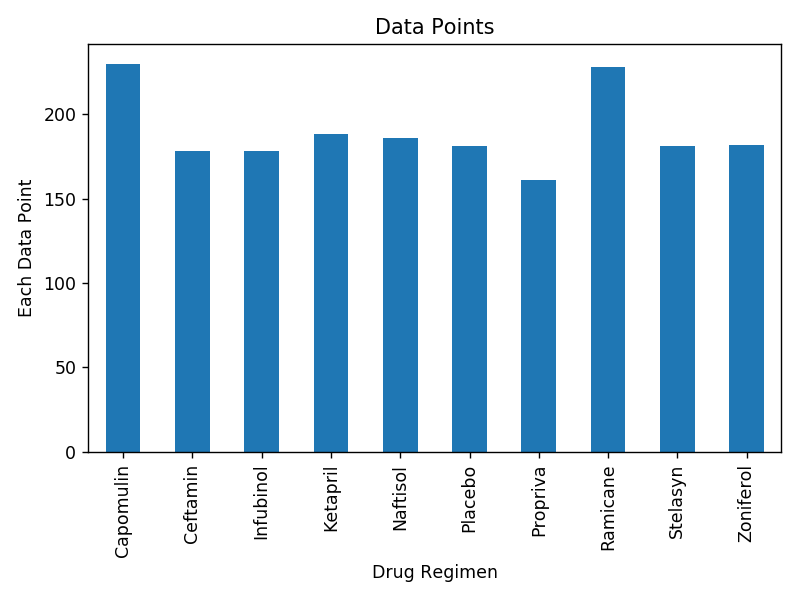

In [67]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
Drug_Regimen_Data_Points.plot(kind="bar")

plt.title("Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Each Data Point")

plt.show()
plt.tight_layout()

In [68]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
Data_Points = [230, 178, 178, 188, 186]

x_axis = np.arange(len(Drug_Regimen_Data_Points))

plt.bar(x_axis, Data_Points, color='b', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Data_Points)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(Data_Points)+10)

plt.title("Data Points")
plt.xlabel("Drug Regimen")
plt.ylabel("Each Data Point")

plt.show()





ValueError: shape mismatch: objects cannot be broadcast to a single shape

## Pie plots

<IPython.core.display.Javascript object>


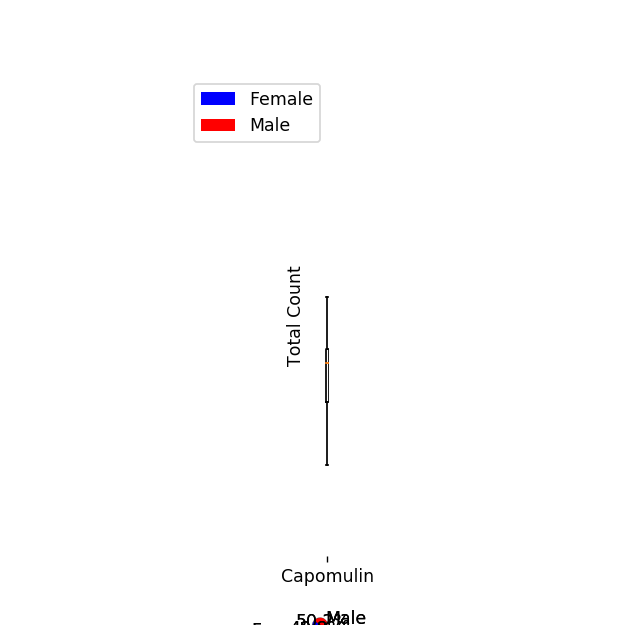

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
groupby_gender = df.groupby(["Mouse ID","Sex"])
groupby_gender

mouse_gender_df = pd.DataFrame(groupby_gender.size())

mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

colors = ['blue', 'red']
explode = (0.1, 0)
plot = mouse_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=140, explode = explode, autopct="%1.1f%%", shadow = True)

In [70]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female","Male"]

sizes = [49.8,50.2]

colors = ['blue', 'red']

explode = (0.1, 0)

In [71]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)


([<matplotlib.patches.Wedge at 0x204d6920240>,
 [Text(-0.777105718598616, -0.9143887040648134, 'Female'),
  Text(0.7123468302384167, 0.8381897120874728, 'Male')],
 [Text(-0.45331166918252597, -0.5333934107044744, '49.8%'),
  Text(0.3885528164936818, 0.45719438841134874, '50.2%')])

## Quartiles, outliers and boxplots

In [72]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#quartiles = df['Drug Regimen'].quantile([.25,.5,.75])
#lowerq = quartiles[0.25]
#upperq = quartiles[0.75]
#iqr = upperq-lowerq

#print(f"The lower quartile of occupancy is: {lowerq}")
#print(f"The upper quartile of occupancy is: {upperq}")
#print(f"The interquartile range of occupancy is: {iqr}")
#print(f"The the median of occupancy is: {quartiles[0.5]} ")


#Outlier_Tumor_Volume = df.loc[(california_data['Drug Regimen'] < lower_bound) | (df['Drug Regimen'] > upper_bound)]
#Outlier_Tumor_Volume

Final_Tumor_Volume = df[df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
Final_Tumor_Volume = Final_Tumor_Volume.sort_values(["Timepoint"], ascending=True)
Final_Tumor_Volume

Final_Tumor_Volume_data = Final_Tumor_Volume[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

Final_Tumor_Volume_data

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.000000
1391,Infubinol,q132,0,45.000000
195,Capomulin,i738,0,45.000000
205,Ramicane,a520,0,45.000000
1370,Ceftamin,p438,0,45.000000
...,...,...,...,...
350,Capomulin,v923,45,40.658124
144,Capomulin,m957,45,33.329098
337,Capomulin,j119,45,38.125164
59,Ramicane,s508,45,30.276232


In [73]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest 1
Final_Tumor_Volume_Sort = Final_Tumor_Volume_data.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
Final_Tumor_Volume.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1391,q132,Infubinol,Female,1,30,0,45.0,0
195,i738,Capomulin,Female,23,20,0,45.0,0
205,a520,Ramicane,Male,13,21,0,45.0,0
1370,p438,Ceftamin,Female,11,26,0,45.0,0


In [74]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest 2
Final_Tumor_df = Final_Tumor_Volume_Sort.to_frame()
Final_Tumor_df



Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [75]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest 3
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
top_4


['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [76]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest 4
Final_Tumor_df = Final_Tumor_df.reset_index()
tumor_lists = Final_Tumor_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_lists)
tumor_list_df = tumor_list_df.reindex(top_4)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()

## Line and scatter plots

<IPython.core.display.Javascript object>


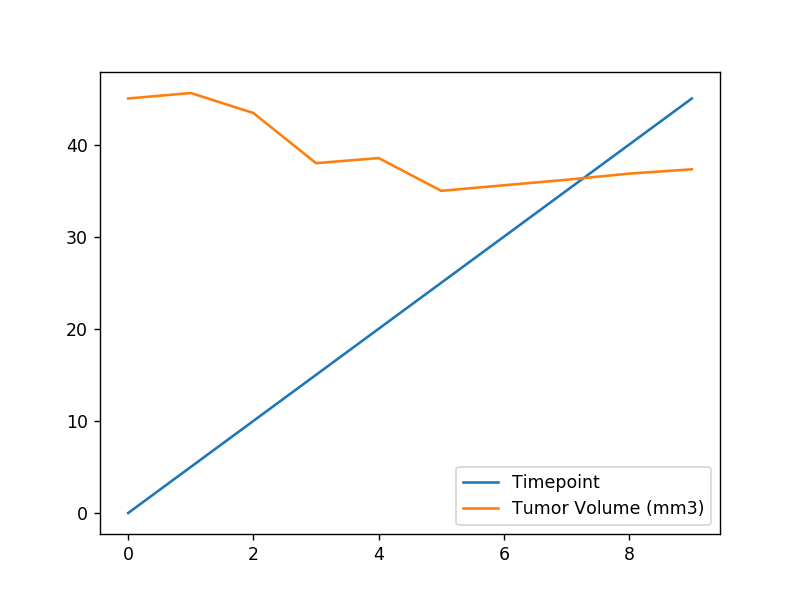

In [77]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumor = df[df["Mouse ID"].isin(["i738"])]
time_vs_tumor

time_vs_tumor_df = time_vs_tumor[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_vs_tumor_df

line_plot_df = time_vs_tumor_df.reset_index()
line_plot_df

line_plot = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot

Tumor_Line_Plot = line_plot.plot.line()


<IPython.core.display.Javascript object>


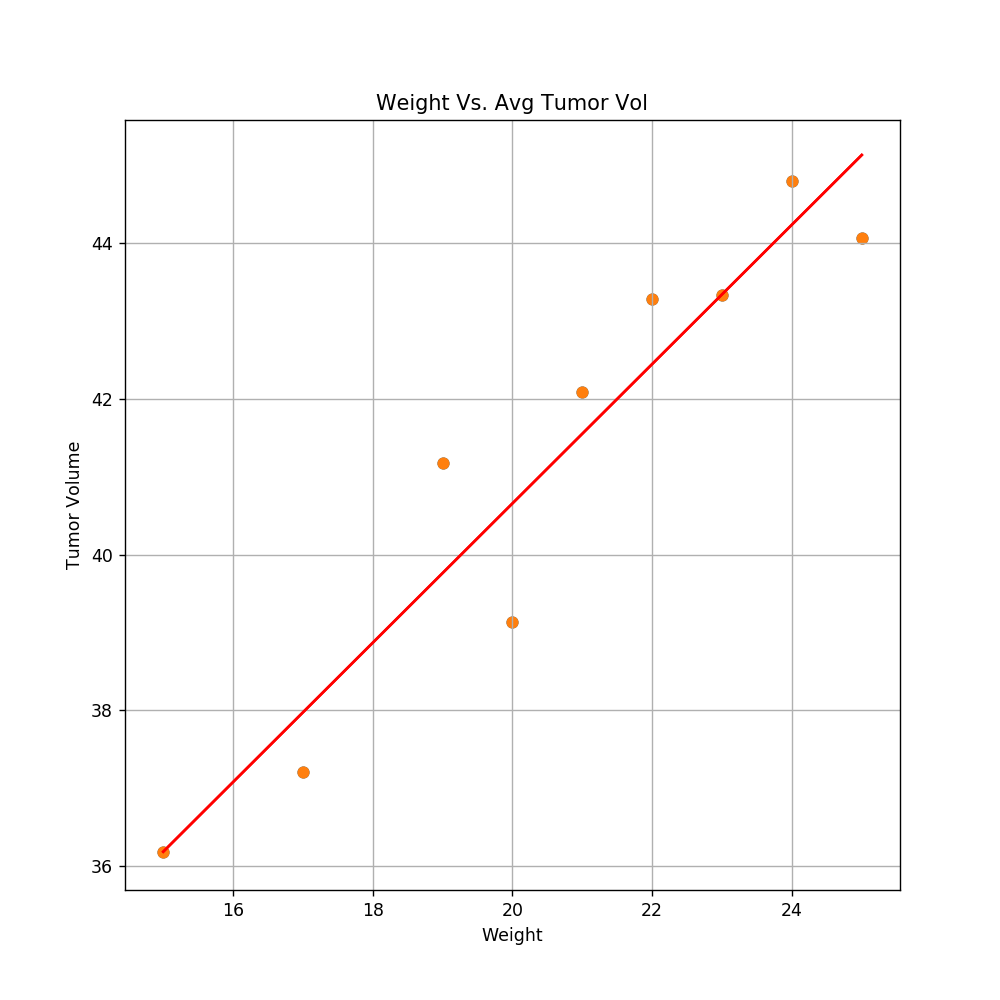

In [78]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_scatter = df[df["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = Final_Tumor_Volume[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_sorted = capomulin_scatter_plot.sort_values(["Weight (g)"], ascending=True)

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capomulin_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

capomulin_scatter = capomulin_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

In [80]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_grouped_plot["Weight (g)"]
y_values = capomulin_grouped_plot["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.title("Weight Vs. Avg Tumor Vol")
plt.show()